## 1. Load Libraries & Dataset

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Configure settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


In [3]:
# Load the feature-engineered dataset
df = pd.read_csv('flight_dataset_engineered.csv')

print("=" * 80)
print("DATASET LOADED")
print("=" * 80)
print(f"Shape: {df.shape}")
print(f"\n✅ Feature-engineered dataset loaded successfully")

DATASET LOADED
Shape: (300153, 57)

✅ Feature-engineered dataset loaded successfully


In [4]:
# Quick preview
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_hour,arrival_hour,departure_period,arrival_period,duration_minutes,is_red_eye,stops_encoded,airline_Airasia,airline_Go First,airline_Indigo,airline_Spicejet,airline_Vistara,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,source_Mumbai,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai,class_Economy,dep_period_Evening,dep_period_Late Night,dep_period_Morning,dep_period_Night,arr_period_Evening,arr_period_Late Night,arr_period_Morning,arr_period_Night,price_per_hour,duration_category,booking_urgency,is_peak_hour,route_popularity,airline_avg_price,demand_score,is_direct,class_route_avg_price,duration_cat_medium_haul,duration_cat_short_haul,urgency_last_minute,urgency_one_month,urgency_one_week,urgency_two_weeks
0,Spicejet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,18,22,Evening,Night,130,0,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,True,2747.54,short_haul,last_minute,1,15289,6180.70,100.0,1,6059.83,False,True,True,False,False,False
1,Spicejet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,6,9,Morning,Morning,140,0,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,True,False,2551.29,short_haul,last_minute,1,15289,6180.70,100.0,1,6059.83,False,True,True,False,False,False
2,Airasia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,6,6,Morning,Morning,130,0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,True,False,2748.92,short_haul,last_minute,1,15289,4096.95,100.0,1,6059.83,False,True,True,False,False,False
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,9,14,Morning,Afternoon,135,0,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,2646.67,short_haul,last_minute,1,15289,30225.73,100.0,1,6059.83,False,True,True,False,False,False
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,9,9,Morning,Morning,140,0,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,True,False,2552.14,short_haul,last_minute,1,15289,30225.73,100.0,1,6059.83,False,True,True,False,False,False


## 2. Feature Selection & Preparation

In [5]:
# Identify numeric and categorical columns
print("=" * 80)
print("FEATURE ANALYSIS")
print("=" * 80)

# Columns to exclude from features
exclude_cols = ['price', 'flight', 'airline', 'source_city', 'destination_city', 
                'departure_time', 'arrival_time', 'stops', 'class',
                'departure_period', 'arrival_period', 'duration_category', 'booking_urgency']

# Select all columns except target and original categorical (we have encoded versions)
feature_cols = [col for col in df.columns if col not in exclude_cols]

print(f"Total features: {len(feature_cols)}")
print(f"\nFeatures to use:")
for i, col in enumerate(feature_cols, 1):
    print(f"   {i}. {col}")

FEATURE ANALYSIS
Total features: 44

Features to use:
   1. duration
   2. days_left
   3. departure_hour
   4. arrival_hour
   5. duration_minutes
   6. is_red_eye
   7. stops_encoded
   8. airline_Airasia
   9. airline_Go First
   10. airline_Indigo
   11. airline_Spicejet
   12. airline_Vistara
   13. source_Chennai
   14. source_Delhi
   15. source_Hyderabad
   16. source_Kolkata
   17. source_Mumbai
   18. destination_Chennai
   19. destination_Delhi
   20. destination_Hyderabad
   21. destination_Kolkata
   22. destination_Mumbai
   23. class_Economy
   24. dep_period_Evening
   25. dep_period_Late Night
   26. dep_period_Morning
   27. dep_period_Night
   28. arr_period_Evening
   29. arr_period_Late Night
   30. arr_period_Morning
   31. arr_period_Night
   32. price_per_hour
   33. is_peak_hour
   34. route_popularity
   35. airline_avg_price
   36. demand_score
   37. is_direct
   38. class_route_avg_price
   39. duration_cat_medium_haul
   40. duration_cat_short_haul
   41. 

In [6]:
# Prepare X (features) and y (target)
X = df[feature_cols].copy()
y = df['price'].copy()

print("=" * 80)
print("FEATURES AND TARGET PREPARED")
print("=" * 80)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nTarget statistics (price):")
print(f"   Mean: ${y.mean():.2f}")
print(f"   Median: ${y.median():.2f}")
print(f"   Std: ${y.std():.2f}")
print(f"   Min: ${y.min():.2f}")
print(f"   Max: ${y.max():.2f}")

FEATURES AND TARGET PREPARED
X shape: (300153, 44)
y shape: (300153,)

Target statistics (price):
   Mean: $20817.90
   Median: $7425.00
   Std: $22492.76
   Min: $1776.00
   Max: $76736.00


In [7]:
# Check for any missing values in features
print("\nChecking for missing values...")
missing = X.isnull().sum()
if missing.sum() > 0:
    print("⚠️ Missing values found:")
    print(missing[missing > 0])
    # Fill missing values with median for numeric columns
    X = X.fillna(X.median())
    print("✅ Missing values filled with median")
else:
    print("✅ No missing values in features")


Checking for missing values...
✅ No missing values in features


## 3. Train-Test Split (80/20)

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=" * 80)
print("TRAIN-TEST SPLIT COMPLETED")
print("=" * 80)
print(f"Training set:")
print(f"   X_train shape: {X_train.shape}")
print(f"   y_train shape: {y_train.shape}")
print(f"\nTest set:")
print(f"   X_test shape: {X_test.shape}")
print(f"   y_test shape: {y_test.shape}")
print(f"\nSplit ratio: {len(X_train)/len(X)*100:.1f}% train, {len(X_test)/len(X)*100:.1f}% test")

TRAIN-TEST SPLIT COMPLETED
Training set:
   X_train shape: (240122, 44)
   y_train shape: (240122,)

Test set:
   X_test shape: (60031, 44)
   y_test shape: (60031,)

Split ratio: 80.0% train, 20.0% test


## 4. Feature Scaling

In [9]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("=" * 80)
print("FEATURE SCALING COMPLETED (StandardScaler)")
print("=" * 80)
print(f"✅ Features standardized to mean=0, std=1")
print(f"\nScaled training data statistics:")
print(X_train_scaled.describe().loc[['mean', 'std']].round(3))

FEATURE SCALING COMPLETED (StandardScaler)
✅ Features standardized to mean=0, std=1

Scaled training data statistics:
      duration  days_left  departure_hour  arrival_hour  duration_minutes  \
mean      -0.0       -0.0            -0.0          -0.0              -0.0   
std        1.0        1.0             1.0           1.0               1.0   

      is_red_eye  stops_encoded  airline_Airasia  airline_Go First  \
mean        -0.0            0.0             -0.0               0.0   
std          1.0            1.0              1.0               1.0   

      airline_Indigo  airline_Spicejet  airline_Vistara  source_Chennai  \
mean             0.0               0.0              0.0             0.0   
std              1.0               1.0              1.0             1.0   

      source_Delhi  source_Hyderabad  source_Kolkata  source_Mumbai  \
mean          -0.0              -0.0            -0.0           -0.0   
std            1.0               1.0             1.0            1.0   


## 5. Train Linear Regression Model

In [10]:
# Initialize and train the model
print("=" * 80)
print("TRAINING LINEAR REGRESSION MODEL")
print("=" * 80)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print("✅ Linear Regression model trained successfully")
print(f"\nModel parameters:")
print(f"   Intercept: ${lr_model.intercept_:.2f}")
print(f"   Number of coefficients: {len(lr_model.coef_)}")

TRAINING LINEAR REGRESSION MODEL
✅ Linear Regression model trained successfully

Model parameters:
   Intercept: $20818.49
   Number of coefficients: 44
✅ Linear Regression model trained successfully

Model parameters:
   Intercept: $20818.49
   Number of coefficients: 44


In [11]:
# Display top feature coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n=" * 80)
print("TOP 15 MOST INFLUENTIAL FEATURES")
print("=" * 80)
print(coefficients.head(15).to_string(index=False))

print("\n📊 Interpretation:")
print("   - Positive coefficients increase price")
print("   - Negative coefficients decrease price")
print("   - Magnitude indicates strength of influence")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
TOP 15 MOST INFLUENTIAL FEATURES
                Feature    Coefficient
       duration_minutes -191442.362979
               duration  191366.015400
           demand_score  -38418.565681
              days_left  -27698.749286
       route_popularity   27138.127016
  class_route_avg_price   20754.791555
        airline_Vistara    1876.285149
           arrival_hour    1872.195660
duration_cat_short_haul   -1483.100816
    urgency_last_minute    1186.562244
  arr_period_Late Night     936.654561
          stops_encoded     819.999790
       arr_period_Night    -808.183513
      urgency_two_weeks     743.387929
         airline_Indigo     733.715116

📊 Interpretation:
   - Positive coefficients increase price
   - Negative coefficients decrease price
   - Magnitude indicates strength of influence


In [12]:
# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

print("✅ Predictions generated for train and test sets")

✅ Predictions generated for train and test sets


## 6. Model Evaluation

In [13]:
# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, dataset_name=""):
    """Calculate and display regression metrics"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"   RMSE (Root Mean Squared Error): ${rmse:,.2f}")
    print(f"   MAE (Mean Absolute Error): ${mae:,.2f}")
    print(f"   MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
    print(f"   R² Score: {r2:.4f}")
    
    return {'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2}

print("=" * 80)
print("LINEAR REGRESSION - PERFORMANCE EVALUATION")
print("=" * 80)

# Training metrics
train_metrics = calculate_metrics(y_train, y_train_pred, "TRAINING SET")

# Test metrics
test_metrics = calculate_metrics(y_test, y_test_pred, "TEST SET")

# Create comparison table
print("\n" + "=" * 80)
print("METRICS COMPARISON")
print("=" * 80)
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE (%)', 'R²'],
    'Training': [f"${train_metrics['RMSE']:,.2f}", f"${train_metrics['MAE']:,.2f}", 
                 f"{train_metrics['MAPE']:.2f}%", f"{train_metrics['R2']:.4f}"],
    'Test': [f"${test_metrics['RMSE']:,.2f}", f"${test_metrics['MAE']:,.2f}", 
             f"{test_metrics['MAPE']:.2f}%", f"{test_metrics['R2']:.4f}"]
})
print(metrics_df.to_string(index=False))

LINEAR REGRESSION - PERFORMANCE EVALUATION

TRAINING SET Metrics:
   RMSE (Root Mean Squared Error): $6,010.80
   MAE (Mean Absolute Error): $4,101.95
   MAPE (Mean Absolute Percentage Error): 41.52%
   R² Score: 0.9286

TEST SET Metrics:
   RMSE (Root Mean Squared Error): $5,987.38
   MAE (Mean Absolute Error): $4,084.96
   MAPE (Mean Absolute Percentage Error): 41.18%
   R² Score: 0.9291

METRICS COMPARISON
  Metric  Training      Test
    RMSE $6,010.80 $5,987.38
     MAE $4,101.95 $4,084.96
MAPE (%)    41.52%    41.18%
      R²    0.9286    0.9291


In [14]:
# Interpretation of results
print("\n" + "=" * 80)
print("📊 MODEL INTERPRETATION")
print("=" * 80)

print(f"\n✅ Key Findings:")
print(f"   1. R² Score: {test_metrics['R2']:.4f}")
if test_metrics['R2'] > 0.8:
    print(f"      → Excellent model fit! Explains {test_metrics['R2']*100:.1f}% of price variance")
elif test_metrics['R2'] > 0.6:
    print(f"      → Good model fit! Explains {test_metrics['R2']*100:.1f}% of price variance")
else:
    print(f"      → Moderate fit. Explains {test_metrics['R2']*100:.1f}% of price variance")

print(f"\n   2. MAE: ${test_metrics['MAE']:,.2f}")
print(f"      → On average, predictions are off by ${test_metrics['MAE']:,.2f}")

print(f"\n   3. MAPE: {test_metrics['MAPE']:.2f}%")
print(f"      → Average prediction error is {test_metrics['MAPE']:.2f}% of actual price")

print(f"\n   4. Train vs Test Performance:")
if abs(train_metrics['R2'] - test_metrics['R2']) < 0.05:
    print(f"      → Good generalization (minimal overfitting)")
else:
    print(f"      → Some overfitting detected (R² difference: {abs(train_metrics['R2'] - test_metrics['R2']):.4f})")


📊 MODEL INTERPRETATION

✅ Key Findings:
   1. R² Score: 0.9291
      → Excellent model fit! Explains 92.9% of price variance

   2. MAE: $4,084.96
      → On average, predictions are off by $4,084.96

   3. MAPE: 41.18%
      → Average prediction error is 41.18% of actual price

   4. Train vs Test Performance:
      → Good generalization (minimal overfitting)


## 7. Visualizations

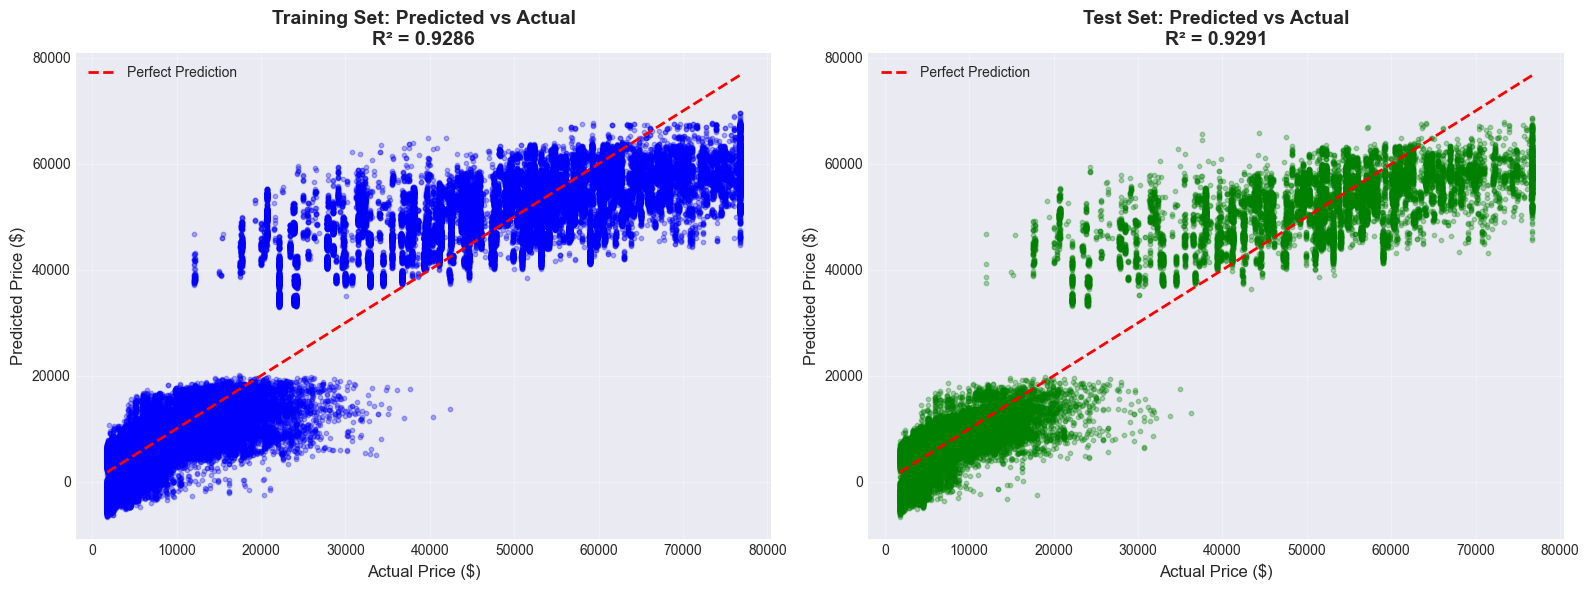


📊 Interpretation:
   - Points closer to the red line indicate better predictions
   - Scatter around the line shows prediction variability


In [15]:
# Predicted vs Actual Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.3, s=10, c='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($)', fontsize=12)
axes[0].set_ylabel('Predicted Price ($)', fontsize=12)
axes[0].set_title(f'Training Set: Predicted vs Actual\nR² = {train_metrics["R2"]:.4f}', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.3, s=10, c='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($)', fontsize=12)
axes[1].set_ylabel('Predicted Price ($)', fontsize=12)
axes[1].set_title(f'Test Set: Predicted vs Actual\nR² = {test_metrics["R2"]:.4f}', 
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("   - Points closer to the red line indicate better predictions")
print("   - Scatter around the line shows prediction variability")

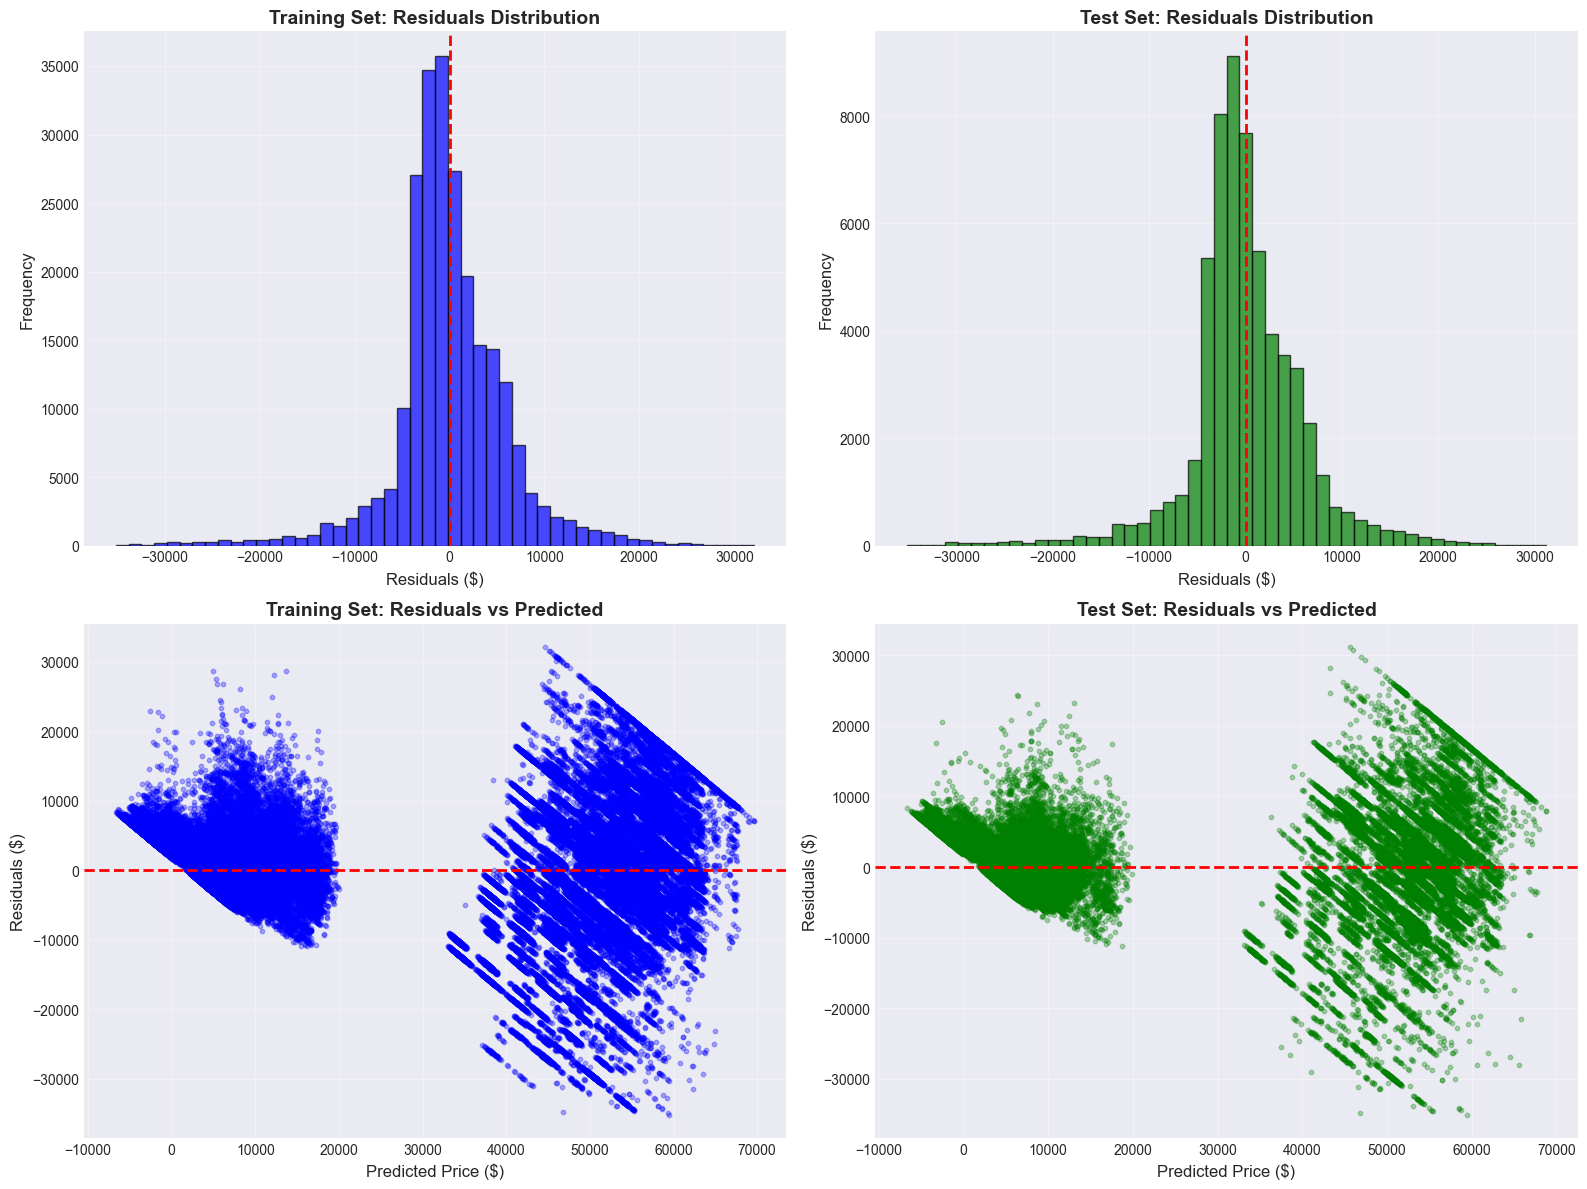


📊 Residuals Interpretation:
   - Residuals should be normally distributed around zero
   - Random scatter indicates good model fit
   - Patterns suggest model may be missing important relationships

Residuals Statistics (Test Set):
   Mean: $2.05 (should be close to 0)
   Std Dev: $5987.43
   Min: $-35107.62
   Max: $31152.04


In [16]:
# Residuals Analysis
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Residuals distribution - Training
axes[0, 0].hist(train_residuals, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Residuals ($)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Training Set: Residuals Distribution', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Residuals distribution - Test
axes[0, 1].hist(test_residuals, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals ($)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Test Set: Residuals Distribution', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Residuals vs Predicted - Training
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.3, s=10, c='blue')
axes[1, 0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Price ($)', fontsize=12)
axes[1, 0].set_ylabel('Residuals ($)', fontsize=12)
axes[1, 0].set_title('Training Set: Residuals vs Predicted', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Residuals vs Predicted - Test
axes[1, 1].scatter(y_test_pred, test_residuals, alpha=0.3, s=10, c='green')
axes[1, 1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Price ($)', fontsize=12)
axes[1, 1].set_ylabel('Residuals ($)', fontsize=12)
axes[1, 1].set_title('Test Set: Residuals vs Predicted', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Residuals Interpretation:")
print("   - Residuals should be normally distributed around zero")
print("   - Random scatter indicates good model fit")
print("   - Patterns suggest model may be missing important relationships")
print(f"\nResiduals Statistics (Test Set):")
print(f"   Mean: ${test_residuals.mean():.2f} (should be close to 0)")
print(f"   Std Dev: ${test_residuals.std():.2f}")
print(f"   Min: ${test_residuals.min():.2f}")
print(f"   Max: ${test_residuals.max():.2f}")

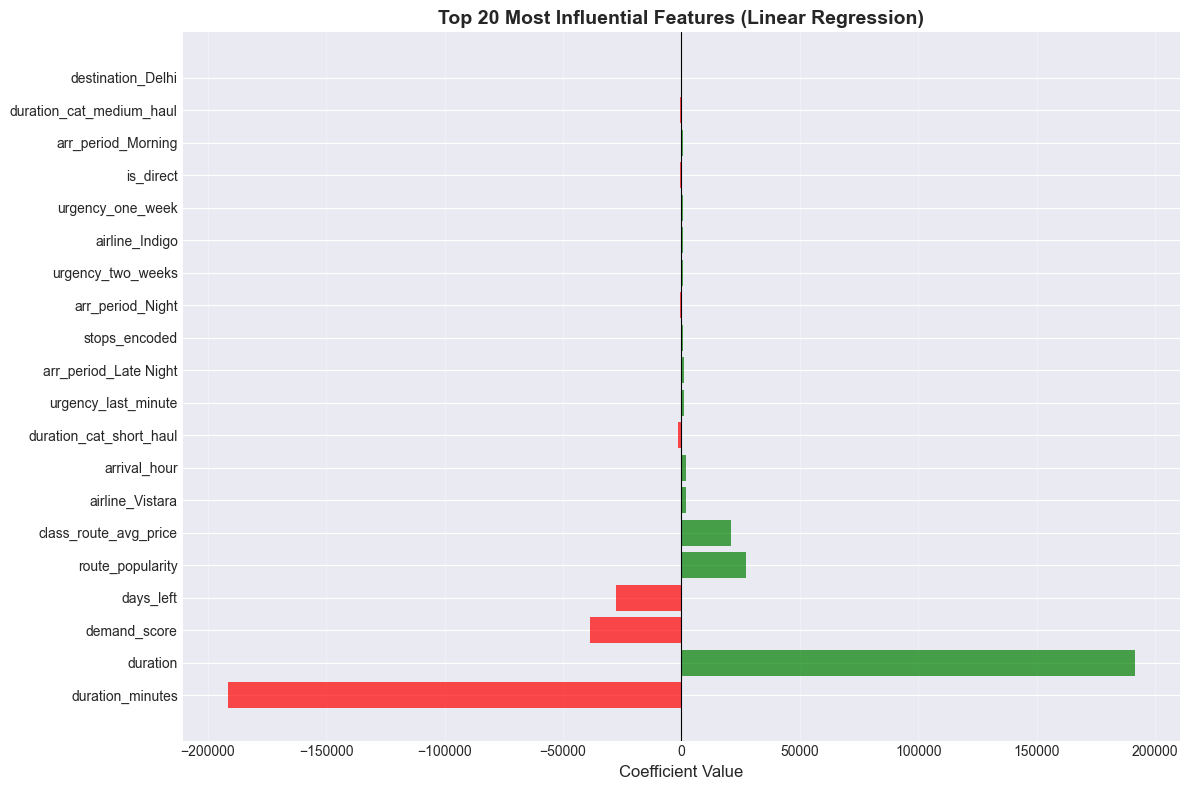


📊 Feature Influence:
   - Green bars: Features that increase price
   - Red bars: Features that decrease price
   - Length indicates strength of influence


In [17]:
# Feature Importance (based on absolute coefficients)
plt.figure(figsize=(12, 8))

top_features = coefficients.head(20)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]

plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Top 20 Most Influential Features (Linear Regression)', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n📊 Feature Influence:")
print("   - Green bars: Features that increase price")
print("   - Red bars: Features that decrease price")
print("   - Length indicates strength of influence")

## 8. Save Model

In [ ]:
# Save the trained model and scaler together
model_filename = 'linear_regression_flight_model.pkl'

# Save both scaler and model in a dictionary
model_package = {
    'scaler': scaler,
    'model': lr_model
}

with open(model_filename, 'wb') as f:
    pickle.dump(model_package, f)

print("=" * 80)
print("✅ MODEL SAVED SUCCESSFULLY")
print("=" * 80)
print(f"Model file: {model_filename}")
print(f"\nModel Summary:")
print(f"   Algorithm: Linear Regression (with StandardScaler)")
print(f"   Features: {len(feature_cols)}")
print(f"   Training samples: {len(X_train):,}")
print(f"   Test samples: {len(X_test):,}")
print(f"   Test R² Score: {test_metrics['R2']:.4f}")
print(f"   Test MAE: ${test_metrics['MAE']:,.2f}")
print(f"   Test MAPE: {test_metrics['MAPE']:.2f}%")
print(f"\n💡 Note: Model saved with scaler included for proper predictions")

✅ MODEL SAVED SUCCESSFULLY
Model file: linear_regression_flight_model.pkl
Scaler file: scaler_linear_regression.pkl

Model Summary:
   Algorithm: Linear Regression
   Features: 44
   Training samples: 240,122
   Test samples: 60,031
   Test R² Score: 0.9291
   Test MAE: $4,084.96
   Test MAPE: 41.18%


In [19]:
# Save feature names for future use
feature_names_file = 'feature_names_linear_regression.pkl'
with open(feature_names_file, 'wb') as f:
    pickle.dump(feature_cols, f)

print(f"✅ Feature names saved: {feature_names_file}")

✅ Feature names saved: feature_names_linear_regression.pkl


---
## Summary

### Model: Linear Regression

**Training Configuration:**
- Train/Test Split: 80/20
- Feature Scaling: StandardScaler (mean=0, std=1)
- Total Features: Engineered + Encoded

**Performance Metrics:**
- R² Score: Measures variance explained
- RMSE: Root Mean Squared Error in dollars
- MAE: Mean Absolute Error in dollars
- MAPE: Mean Absolute Percentage Error

**Key Insights:**
1. Linear Regression provides interpretable coefficients
2. Each feature's impact on price is quantified
3. Model assumes linear relationships between features and price
4. Residuals analysis helps identify model limitations